In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
exports_csv = "final_clean_exports.csv"
imports_csv = "final_clean_imports.csv"
exports_df = pd.read_csv(exports_csv)
imports_df = pd.read_csv(imports_csv)

In [10]:
exports_df["Commodity"].value_counts()

Chicken    29623
Pork       24134
Beef       16196
Turkey      8338
Sheep       2682
Goat         112
Name: Commodity, dtype: int64

In [11]:
imports_df["Commodity"].value_counts()

Beef       7893
Pork       7772
Sheep      4342
Chicken    2197
Other       439
Goat          4
Name: Commodity, dtype: int64

In [12]:
chicken_exports = exports_df.loc[(exports_df["Commodity"]=="Chicken")]
beef_exports = exports_df.loc[(exports_df["Commodity"]=="Beef")]
pork_exports = exports_df.loc[(exports_df["Commodity"]=="Pork")]


In [45]:
summary_chicken_exports = chicken_exports.groupby(["Country","Year"]).sum().reset_index()
summary_chicken_exports

,Country,Year,Unnamed: 0,Unnamed: 0.1,AMOUNT,Metric Tons
0,Argentina,2006,91784,4352371,1.885215e+05,5941.725297
1,Argentina,2007,61310,3015057,6.601521e+04,2080.634071
2,Argentina,2008,122863,6118481,6.859173e+04,2161.839401
3,Argentina,2009,61508,3236537,2.221124e+05,7000.424633
4,Argentina,2010,493517,17690181,2.032217e+06,40191.830504
...,...,...,...,...,...,...
184,United Kingdom,2013,47637546,57283366,1.625673e+07,21730.941103
185,United Kingdom,2014,47168789,60613006,2.349701e+07,27613.275016
186,United Kingdom,2015,55549815,74394635,2.801139e+07,182495.685049
187,United Kingdom,2016,51645974,64620640,1.541910e+07,76918.226589


In [63]:
summary_chicken_pivot = summary_chicken_exports.pivot(index="Year", columns="Country", values="Metric Tons")
summary_chicken_pivot.pct_change()

Country,Argentina,Australia,Bulgaria,China (Mainland),Colombia,France,"Germany, Fed. Republic",Greece,India,Indonesia,Italy,Japan,Mexico,Peru,Poland,Saudi Arabia,Turkey,United Kingdom,Zambia
Year,,,,,,,,,,,,,,,,,,,
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,-0.649827,-0.312971,0.00000,0.261759,0.097344,-0.919214,1.392605,0.542004,2.191414,2.937510,0.482877,0.068014,0.071087,6.254043,-0.915440,0.134719,-0.270661,16.722996,NaN
2008,0.039029,0.260523,-0.59724,0.116201,0.145282,1.382076,1.219374,-0.290437,0.475911,95.075788,2.875843,0.207454,0.205566,-0.645414,0.346725,1.699415,0.064874,1.522156,0.0
2009,2.238180,0.690783,0.00000,-0.015740,0.147094,0.350538,0.241520,0.352195,-0.854008,-0.584434,-0.086972,-0.409842,0.196136,2.766544,-0.182591,-0.361666,-0.130701,-0.977149,0.0
2010,4.741342,-0.391412,0.00000,-0.831551,0.230759,2.534731,0.091946,-0.496169,1.021095,-0.970552,-0.190711,1.198438,0.177239,3.236290,-0.998474,0.107092,-0.297351,0.337889,0.0
2011,-0.634712,1.422331,0.00000,0.218515,-0.085130,5.565672,0.014900,-0.455822,5.418574,1.003258,-0.424047,0.334051,0.054597,-0.195858,2.053031,0.343854,-0.061887,0.666191,0.0
2012,-0.991167,0.492440,0.00000,0.397191,0.106013,-0.755637,0.282685,-0.405348,-0.842512,-0.491667,-0.574157,-0.537358,0.232454,0.095315,-0.973984,1.329024,0.528032,-0.214440,0.0
2013,36.864486,0.102243,0.00000,0.375106,0.095322,-0.959412,-0.290663,-0.424614,-0.849640,0.053470,1.228595,-0.261888,0.159572,0.254406,-0.472821,1.118369,-0.021243,-0.607209,0.0
2014,6.356082,0.202682,0.00000,-0.096098,0.001653,-0.248253,0.007608,-0.598184,3.875870,2.158812,-0.862643,0.165194,0.100208,0.053625,0.000000,-0.306771,0.053803,0.270689,0.0


Text(0, 0.5, 'Percent Change')

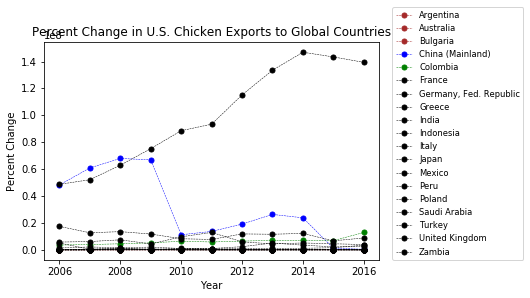

In [73]:
color = "brown"
marker = "o"
columns = []

for column in summary_chicken_pivot:
    if column != "Argentina" or column != "Bulgaria" or column != "Poland"or column != "Zambia":
        
        if column == "China (Mainland)":
            color = "b"
        if column == "Colombia":
            color = "g"
        if column == "France":
            color = "k"
        if column == "France":
            color = "k"
        x_axis = summary_chicken_pivot.index
        y_axis = summary_chicken_pivot[column]
    
        columns.append(column)
    
        plt.errorbar(x_axis, y_axis, color=color, marker=marker, markersize=5, linestyle="dashed", linewidth=0.50)
        
plt.legend(columns,loc=(1.04,0),fontsize="small",fancybox=True)

plt.title("Percent Change in U.S. Chicken Exports to Global Countries")
plt.xlabel("Year")
plt.ylabel("Percent Change")